In [1]:
#-----------------------------------Glass Identification Dataset-------------------------------------------------
#import the required libraries
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("glass.csv", names=["ID Number","Refractive_index", "Sodium", "Magnesium", "Aluminum", "Silicon", "Potassium", "Calcium", "Barium", "Iron", "Type_of_glass"])

In [3]:
df

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.sample(10)

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
213,214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
153,154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
203,204,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
28,29,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
95,96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
171,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5


In [6]:
df.shape

(214, 11)

In [ ]:
#Here the data is continous in nature as well as the dimension is not very high, the cardinality is very high in the target column

In [7]:
df.head()

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.tail()

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
df.isnull().sum()

ID Number           0
Refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

From the above observation , we can see that there are no null values present in the dataset

In [10]:
df['Type_of_glass'].nunique() # there are 6 varients of type of glass

6

# Statistical summary

In [11]:
df.describe()

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From the above observation , in column ID Number the std is 61.9206 , which means that the data are highly spreaded(outliers may be present).
In the column (Type_of_glass), mean is very slightly > than median , which means that skewness may be present.
In the columns (ID Number),Sodium	,Potassium,Calcium and Type_of_glass, there is a gap between 75% and max , which means that outliers may be present.


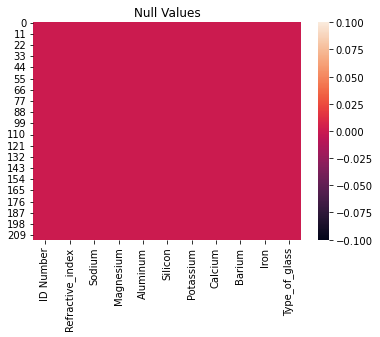

In [12]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

From the above observation , we can see the graphical representation , which shows that there are no null values present

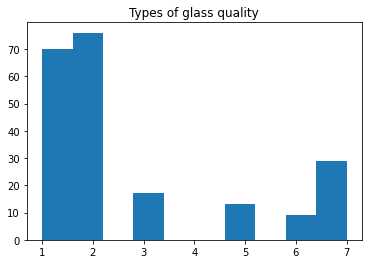

In [14]:
#Target variable
df['Type_of_glass'].hist(grid=False)
plt.title("Types of glass quality")
plt.show()

<AxesSubplot:xlabel='Type_of_glass', ylabel='count'>

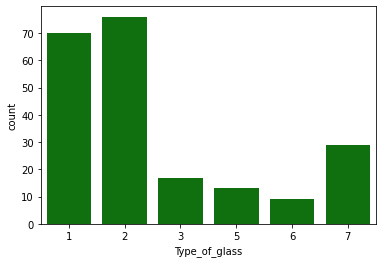

In [15]:
sns.countplot(x=df['Type_of_glass'],color='green')

In [16]:
df['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

From the above observation we can see that for type 1 and type 2 there are highest counts , for type 4 there is none , where as for type 3,5 and 6 has very less counts and fot type 7 has an average count

# Data Visualization

In [17]:
df.dtypes

ID Number             int64
Refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

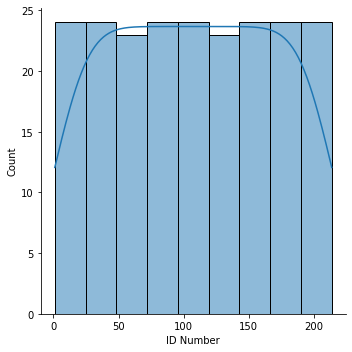

In [18]:
sns.displot(df['ID Number'],kde=True)

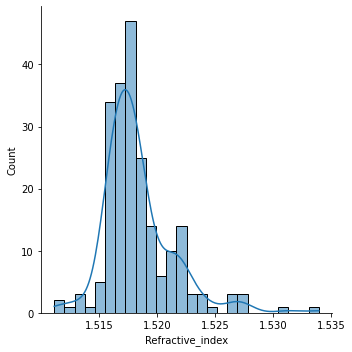

In [19]:
sns.displot(df['Refractive_index'],kde=True)

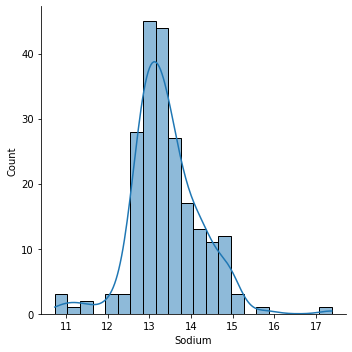

In [20]:
sns.displot(df['Sodium'],kde=True)

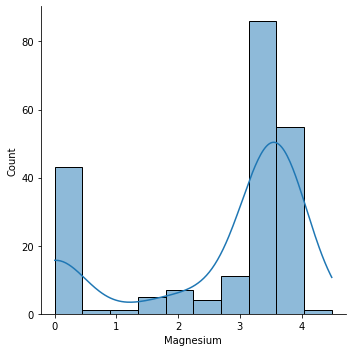

In [21]:
sns.displot(df['Magnesium'],kde=True)

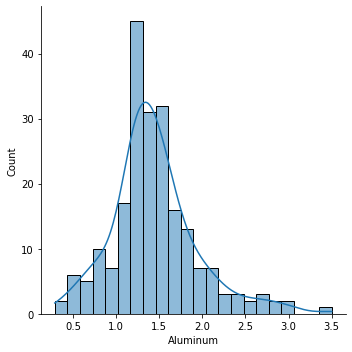

In [22]:
sns.displot(df['Aluminum'],kde=True)

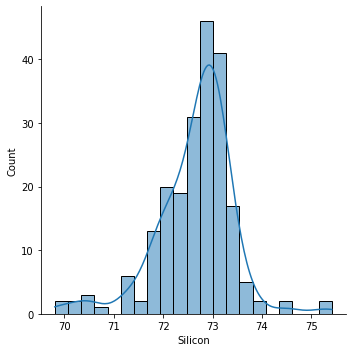

In [23]:
sns.displot(df['Silicon'],kde=True)

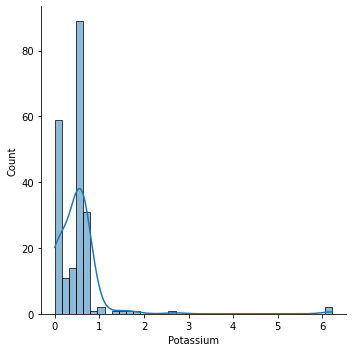

In [24]:
sns.displot(df['Potassium'],kde=True)

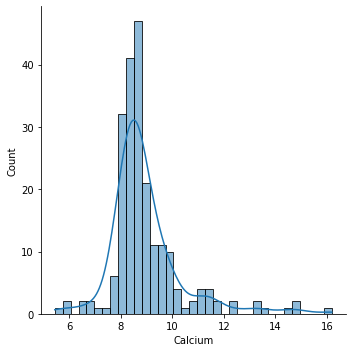

In [25]:
sns.displot(df['Calcium'],kde=True)

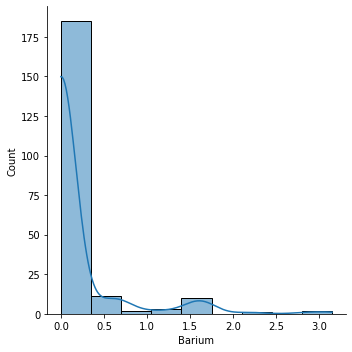

In [26]:
sns.displot(df['Barium'],kde=True)

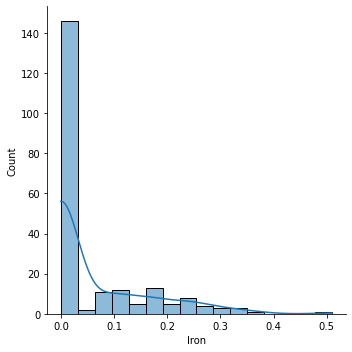

In [27]:
sns.displot(df['Iron'],kde=True)

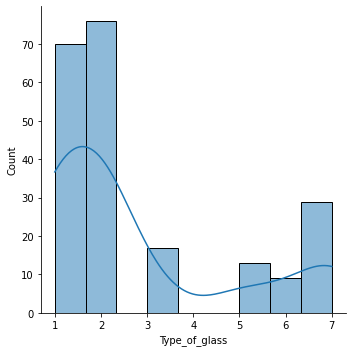

In [28]:
sns.displot(df['Type_of_glass'],kde=True)

From the above observations of the continous value of the float datatype , mostly the data are not normally distributed

<AxesSubplot:xlabel='ID Number', ylabel='Type_of_glass'>

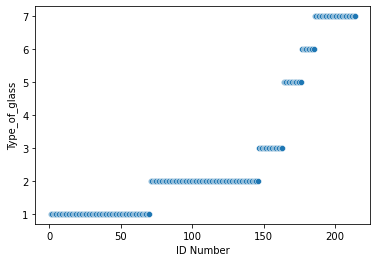

In [29]:
#Using scatter plot ---- > to find the relationship with the target variable

sns.scatterplot(x='ID Number',y='Type_of_glass',data=df)

From the above observation we can see that data is ID number is equally distributed in the range 1 to 214

<AxesSubplot:xlabel='Refractive_index', ylabel='Type_of_glass'>

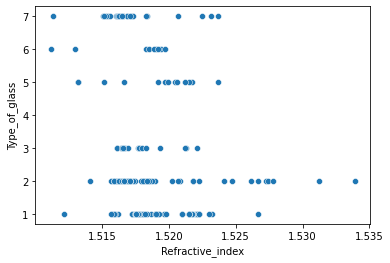

In [30]:
sns.scatterplot(x='Refractive_index',y='Type_of_glass',data=df)

From the above observation we can see that Refractive_index is equally distributed in the range of 1.515 to 1.520

<AxesSubplot:xlabel='Sodium', ylabel='Type_of_glass'>

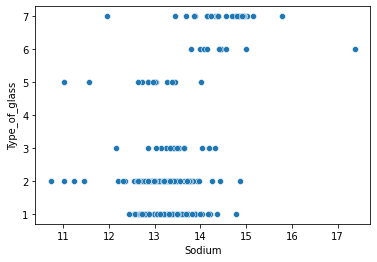

In [31]:
sns.scatterplot(x='Sodium',y='Type_of_glass',data=df)

From the above observation we can see that Sodiun is equally distributed in the range of 12.3 to 14.5

<AxesSubplot:xlabel='Magnesium', ylabel='Type_of_glass'>

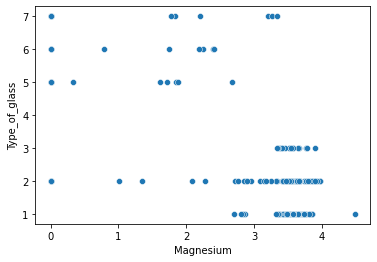

In [33]:
sns.scatterplot(x='Magnesium',y='Type_of_glass',data=df)

From the above observation we can see that Magnesium is equally distributed in the range 2.8 to 4.0

<AxesSubplot:xlabel='Aluminum', ylabel='Type_of_glass'>

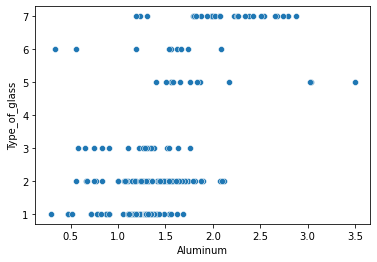

In [34]:
sns.scatterplot(x='Aluminum',y='Type_of_glass',data=df)

From the above observation we can see that Aluminum is equally distributed in the range of 0.7 to 1.9 

<AxesSubplot:xlabel='Silicon', ylabel='Type_of_glass'>

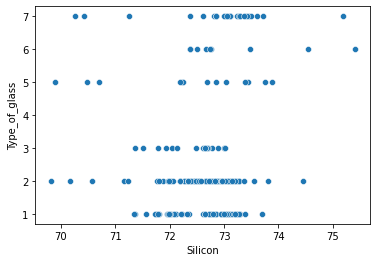

In [35]:
sns.scatterplot(x='Silicon',y='Type_of_glass',data=df)

From the above observation its seen that Silicon is equally distributed in the range 71.8 to 73.5

<AxesSubplot:xlabel='Potassium', ylabel='Type_of_glass'>

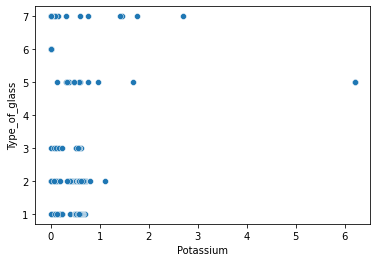

In [36]:
sns.scatterplot(x='Potassium',y='Type_of_glass',data=df)

From the above observation its seen that Potassium is equally distributed in the range 0 to 0.89

<AxesSubplot:xlabel='Calcium', ylabel='Type_of_glass'>

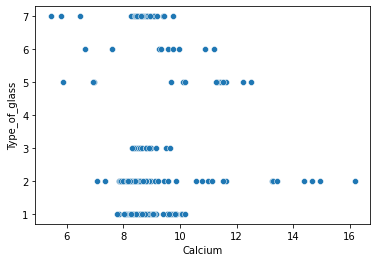

In [37]:
sns.scatterplot(x='Calcium',y='Type_of_glass',data=df)

Form the above observation its seen that Calcium is equally distributed in the range 7.8 to 11.8

<AxesSubplot:xlabel='Barium', ylabel='Type_of_glass'>

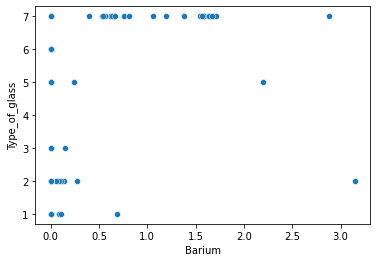

In [38]:
sns.scatterplot(x='Barium',y='Type_of_glass',data=df)

From the above observation its seen that Barium is equally distributed in range 0.5 to 1.0

<AxesSubplot:xlabel='Iron', ylabel='Type_of_glass'>

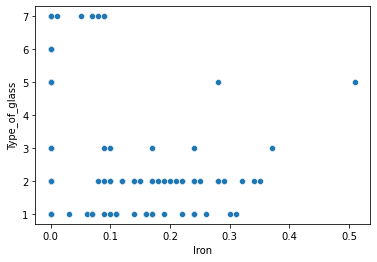

In [39]:
sns.scatterplot(x='Iron',y='Type_of_glass',data=df)

From the above observation its seen that Iron is equally distributed in the range 0.05 to 0.32

# Data Preparation ---> transform of target variable Type_of_glass

There are 214 observations in the dataset. 
The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

In [40]:
#function to assign new quality targets

def new_glass_type(rating):
    '''This function will change the target Type of glass to 0(window glass) or 1(non-window glass)
       The number of target labels will be reduced to 3 instead of 6'''
    if (rating <=4):
        return 0
    else:
        return 1

In [41]:
#create a new target variable -Type_of_glass_new
df['Type_of_glass_new'] = df['Type_of_glass'].apply(new_glass_type)

In [42]:
#check with the head() , the new column has been created
df.head()

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass,Type_of_glass_new
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [43]:
df.sample(20)

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass,Type_of_glass_new
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2,0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7,1
124,125,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2,0
27,28,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1,0
198,199,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7,1
93,94,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2,0
113,114,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2,0
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1,0
84,85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2,0
60,61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1,0


In [44]:
#Create a copy of the dataset
df_new=df.copy()

In [45]:
#drop the redundant target label i,e Type_of_glass from the dataset
df_new.drop('Type_of_glass',axis=1,inplace =True) 

In [46]:
df_new

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass_new
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In the above observation , we have created a new column (Type_of_glass_new) and have dropped the redundant column (Type_of_glass) as the dataset has been divided into window glass (classes 1-4) and non-window glass (classes 5-7).

<function matplotlib.pyplot.show(close=None, block=None)>

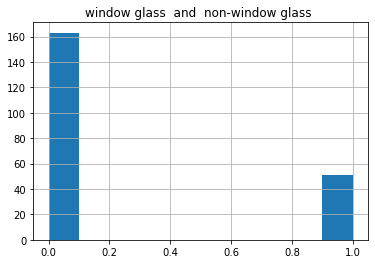

In [47]:
#Target variable

df_new['Type_of_glass_new'].hist(grid=True)
plt.title("window glass  and  non-window glass ")
plt.show

In [48]:
df_new['Type_of_glass_new'].value_counts()

0    163
1     51
Name: Type_of_glass_new, dtype: int64

In [49]:
df_new['Type_of_glass_new'].value_counts(normalize=True)*100

0    76.168224
1    23.831776
Name: Type_of_glass_new, dtype: float64

Here , the above observation shows that data is imbalanced and hence we will perform oversampling (using SMOTE)


In [78]:
#seperating the input and output variables
x=df_new.drop("Type_of_glass_new",axis=1)
x

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [79]:
y=df["Type_of_glass_new"]
y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type_of_glass_new, Length: 214, dtype: int64

# oversampling

In [139]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [140]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

Type_of_glass_new
0                    163
1                    163
dtype: int64

<AxesSubplot:title={'center':'after oversampling'}, xlabel='Type_of_glass_new', ylabel='count'>

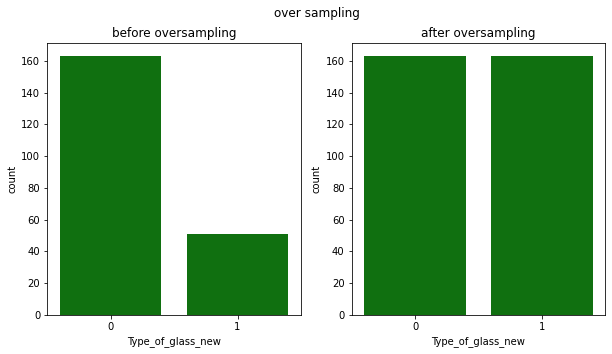

In [141]:
#countplot before and after Oversampling of data

figure, axes = plt.subplots(1, 2, sharex=True,figsize=(10, 5))
figure.suptitle('over sampling')
axes[0].set_title('before oversampling')
axes[1].set_title('after oversampling')
sns.countplot(x = y, color = 'green',ax=axes[0])
sns.countplot(x = yo, color = 'green',ax=axes[1])

# Checking Correlation

In [142]:
df_new.corr()


,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass_new
ID Number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.737956
Refractive_index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Sodium,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Magnesium,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Aluminum,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Silicon,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
Potassium,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Calcium,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Barium,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Iron,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903


In [143]:
corr_mat=df_new.corr()

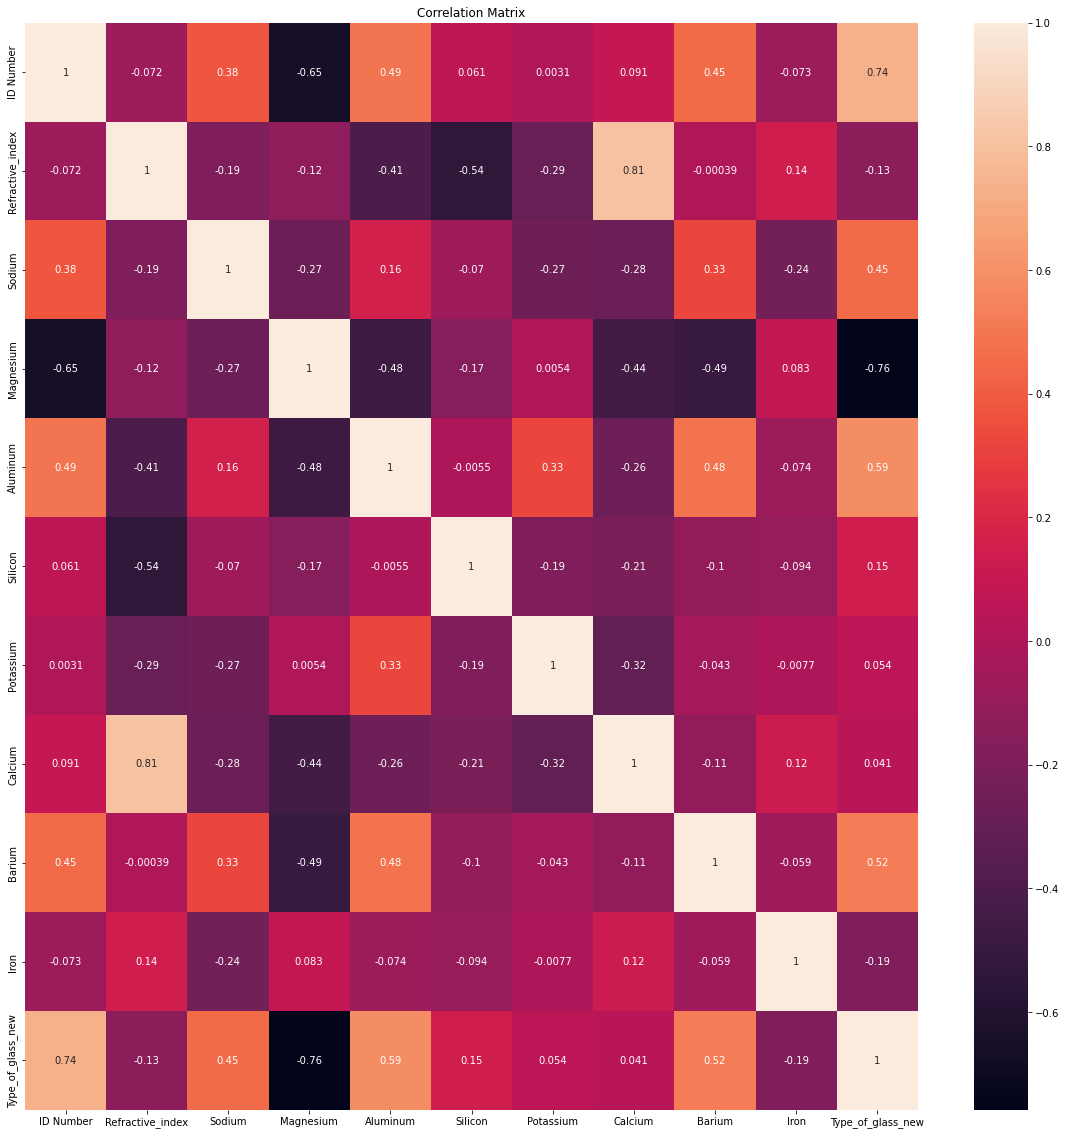

In [144]:
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

From the above correlation matrix , we can see that there is no multicolinearity present as almost the values are < 0.7

In [145]:
# We shall check the correlation with the target variable
corr_matrix=df_new.corr()
corr_matrix["Type_of_glass_new"].sort_values(ascending=False)

Type_of_glass_new    1.000000
ID Number            0.737956
Aluminum             0.585928
Barium               0.523403
Sodium               0.452336
Silicon              0.148072
Potassium            0.053774
Calcium              0.040670
Refractive_index    -0.134327
Iron                -0.194903
Magnesium           -0.758289
Name: Type_of_glass_new, dtype: float64

From the above observation , we can see that, the correlation values in descending form (from highest to lowest) , with ID Number being the highest value of 0.7379 and Magnesium being the lowest value of -0.7582.
Since all the values are <0.7 , there is no any multicolinearity present 

In [146]:
#Check the data distribution among all the columns

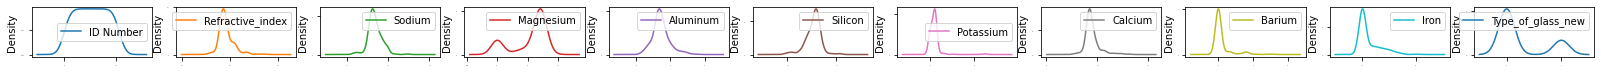

In [147]:
df_new.plot(kind='density',subplots=True,layout=(20,11),sharex=False,legend=True,fontsize=1,figsize=(28,22))
plt.show()

In [148]:
df_new.shape

(214, 11)

# Data Preprocessing

In [149]:
x=df_new.drop("Type_of_glass_new",axis=1)
x

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [150]:
y=df["Type_of_glass_new"]
y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type_of_glass_new, Length: 214, dtype: int64

In [151]:
df_new.shape

(214, 11)

In [152]:
x.shape

(214, 10)

In [153]:
y.shape

(214,)

# Skewness

Ideally the skewness should be zero(0), any other value means that data is not normally distributed.
Splitting the independent and target variables in x and y


In [154]:
xo.skew().sort_values(ascending=False)

Potassium           5.270955
Iron                2.310682
Barium              2.044068
Calcium             1.570313
Refractive_index    1.403237
Aluminum            0.435070
Sodium              0.186161
Magnesium          -0.233926
ID Number          -0.629961
Silicon            -0.728445
dtype: float64

In [155]:
xo.shape

(326, 10)

In [156]:
yo.shape

(326,)

After Oversampling the data , the shape of new xo is (326,10) , From the above observation it is seen that the highest skewness is for Potassium(5.2179)
and moving below , the lowest skewness is for Silicon(-0.866559).We can see skewness in most of the columns of dataset. 
We will remove the skewness by using PowerTransform()

In [157]:
#----------------------------1st iteration-------------------------------------
from sklearn.preprocessing import power_transform,PowerTransformer
import warnings
warnings.filterwarnings('ignore')
pt=PowerTransformer()
x_new_pt=pt.fit_transform(xo)
x_new_pt

array([[-1.95093884,  0.        , -0.01089209, ..., -0.10196924,
        -0.65914119, -0.60872576],
       [-1.94250344,  0.        ,  0.25708663, ..., -0.95368244,
        -0.65914119, -0.60872576],
       [-1.93357753,  0.        , -0.1297609 , ..., -1.00505988,
        -0.65914119, -0.60872576],
       ...,
       [ 0.8472405 ,  0.        ,  1.04954111, ..., -0.60500732,
         1.48178245, -0.60872576],
       [ 0.7606431 ,  0.        ,  0.91189083, ...,  0.92359778,
        -0.65914119, -0.60872576],
       [ 0.72611318,  0.        ,  1.34354561, ...,  0.74457553,
        -0.65914119, -0.60872576]])

In [158]:
x_new=power_transform(xo)
x_new

array([[-1.95093884,  0.        , -0.01089209, ..., -0.10196924,
        -0.65914119, -0.60872576],
       [-1.94250344,  0.        ,  0.25708663, ..., -0.95368244,
        -0.65914119, -0.60872576],
       [-1.93357753,  0.        , -0.1297609 , ..., -1.00505988,
        -0.65914119, -0.60872576],
       ...,
       [ 0.8472405 ,  0.        ,  1.04954111, ..., -0.60500732,
         1.48178245, -0.60872576],
       [ 0.7606431 ,  0.        ,  0.91189083, ...,  0.92359778,
        -0.65914119, -0.60872576],
       [ 0.72611318,  0.        ,  1.34354561, ...,  0.74457553,
        -0.65914119, -0.60872576]])

In [159]:
#Normal distribution=0---->Checking skewness after power transform
pd.DataFrame(x_new,columns=xo.columns).skew().sort_values(ascending=False)

Iron                1.101963
Barium              0.942700
Potassium           0.121970
Silicon             0.099152
Sodium              0.006180
Aluminum            0.003863
Refractive_index    0.000000
Calcium            -0.116140
Magnesium          -0.294336
ID Number          -0.528079
dtype: float64

After the power transform we can see that the skewness has been reduced with maximum as 0.9842 to minimum as -0.525527

In [160]:
xo=pd.DataFrame(x_new,columns=xo.columns)

In [161]:
xo.skew().sort_values(ascending=False)   # Validating the skewness after transformations

Iron                1.101963
Barium              0.942700
Potassium           0.121970
Silicon             0.099152
Sodium              0.006180
Aluminum            0.003863
Refractive_index    0.000000
Calcium            -0.116140
Magnesium          -0.294336
ID Number          -0.528079
dtype: float64

In [162]:
# We shall try to reduce skewness again , using power transform()---------------------------2nd iteration-------------------
from sklearn.preprocessing import power_transform,PowerTransformer
import warnings
warnings.filterwarnings('ignore')
pt=PowerTransformer()
x_new_pt=pt.fit_transform(xo)
x_new_pt

array([[-1.62430585,  0.        , -0.00361938, ..., -0.09622609,
        -0.6803129 , -0.62589269],
       [-1.61980821,  0.        ,  0.26372289, ..., -0.9540569 ,
        -0.6803129 , -0.62589269],
       [-1.61504033,  0.        , -0.12265504, ..., -1.0060546 ,
        -0.6803129 , -0.62589269],
       ...,
       [ 0.86483995,  0.        ,  1.04806293, ..., -0.60185101,
         1.50482094, -0.62589269],
       [ 0.73482078,  0.        ,  0.91236257, ...,  0.92332821,
        -0.6803129 , -0.62589269],
       [ 0.68406151,  0.        ,  1.33728095, ...,  0.74625665,
        -0.6803129 , -0.62589269]])

In [163]:
#Normal distribution=0---->Checking skewness after power transform
pd.DataFrame(x_new_pt,columns=xo.columns).skew().sort_values(ascending=False)

Iron                1.000717
Barium              0.812765
Silicon             0.142134
Potassium           0.095418
Refractive_index    0.000000
Sodium             -0.045153
Aluminum           -0.050028
ID Number          -0.154527
Magnesium          -0.167808
Calcium            -0.191446
dtype: float64

In [164]:
xo=pd.DataFrame(x_new_pt,columns=xo.columns)

In [165]:
xo.skew().sort_values(ascending=False)   # Validating the skewness after transformations

Iron                1.000717
Barium              0.812765
Silicon             0.142134
Potassium           0.095418
Refractive_index    0.000000
Sodium             -0.045153
Aluminum           -0.050028
ID Number          -0.154527
Magnesium          -0.167808
Calcium            -0.191446
dtype: float64

In [166]:
# We shall try to reduce skewness again , using power transform()---------------------------3rd  iteration-------------------
from sklearn.preprocessing import power_transform,PowerTransformer
import warnings
warnings.filterwarnings('ignore')
pt=PowerTransformer()
x_new_pt=pt.fit_transform(xo)
x_new_pt

array([[-1.53744925,  0.        , -0.00375347, ..., -0.09696208,
        -0.68408831, -0.63390813],
       [-1.53369913,  0.        ,  0.26360177, ..., -0.95402948,
        -0.68408831, -0.63390813],
       [-1.52972233,  0.        , -0.12278663, ..., -1.00594846,
        -0.68408831, -0.63390813],
       ...,
       [ 0.85657742,  0.        ,  1.04809305, ..., -0.60226934,
         1.47646224, -0.63390813],
       [ 0.7104675 ,  0.        ,  0.9123567 , ...,  0.92338393,
        -0.68408831, -0.63390813],
       [ 0.65398742,  0.        ,  1.33739909, ...,  0.74606086,
        -0.68408831, -0.63390813]])

In [167]:
#Normal distribution=0---->Checking skewness after power transform
pd.DataFrame(x_new_pt,columns=xo.columns).skew().sort_values(ascending=False)

Iron                0.957899
Barium              0.783386
Silicon             0.137400
Potassium           0.088672
Refractive_index    0.000000
ID Number          -0.031935
Sodium             -0.044205
Aluminum           -0.048305
Magnesium          -0.091540
Calcium            -0.181749
dtype: float64

In [168]:
xo=pd.DataFrame(x_new_pt,columns=xo.columns)

In [169]:
xo.skew().sort_values(ascending=False)   # Validating the skewness after transformations

Iron                0.957899
Barium              0.783386
Silicon             0.137400
Potassium           0.088672
Refractive_index    0.000000
ID Number          -0.031935
Sodium             -0.044205
Aluminum           -0.048305
Magnesium          -0.091540
Calcium            -0.181749
dtype: float64

# Checking for Outliers

the acceptable range is from +3 to -3 , anything above/below this range is considered as outliers

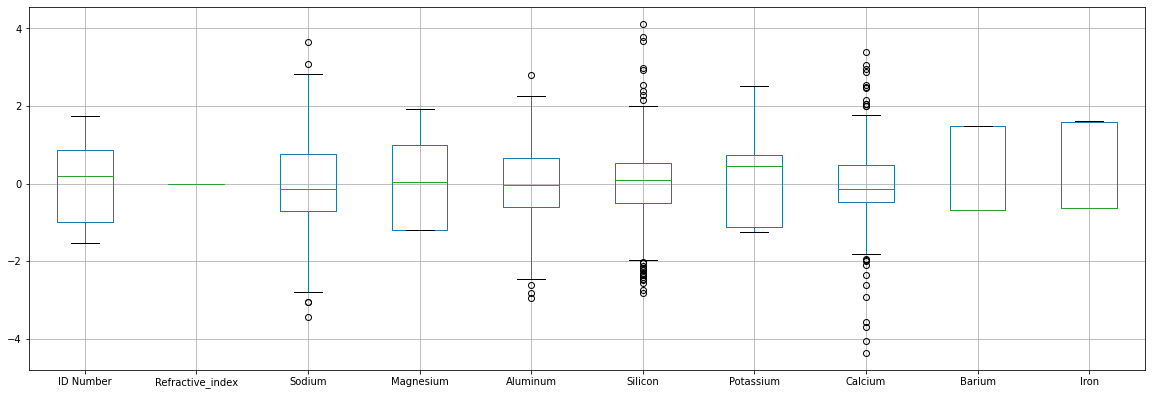

In [170]:
xo.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Removing outliers

In [177]:
xo.shape

(326, 10)

In [178]:
#using zscore technique , we shall use the values of xo(the new values after oversampling) 
from scipy.stats import zscore
z=np.abs(zscore(xo))
z.shape

(326, 10)

In [179]:
threshold=3
print(np.where(z>3))

(array([106, 107, 111, 111, 163, 166, 184, 184, 185, 186, 201, 285, 285,
       318], dtype=int64), array([2, 7, 2, 7, 7, 2, 2, 5, 7, 7, 5, 2, 5, 7], dtype=int64))


In [180]:
xo_new=xo[(z<3).all(axis=1)]

In [182]:
(np.abs(zscore(xo))).all().all()

True

In [183]:
(np.abs(zscore(x))<3).all().all()

False

The above result shows that outliers are present in columns -----> Calcium and Silicon , and hence we can drop those columns

In [186]:
xo.shape

(326, 10)

In [187]:
yo.shape

(326,)

In [188]:
xo=xo.drop(['Calcium','Silicon'],axis=1)

In [189]:
xo

,ID Number,Refractive_index,Sodium,Magnesium,Aluminum,Potassium,Barium,Iron
0,-1.537449,0.0,-0.003753,1.913696,-0.949759,-0.917116,-0.684088,-0.633908
1,-1.533699,0.0,0.263602,1.035877,-0.423136,0.506263,-0.684088,-0.633908
2,-1.529722,0.0,-0.122787,0.990126,-0.083063,0.291473,-0.684088,-0.633908
3,-1.525565,0.0,-0.473888,1.119230,-0.560599,0.690679,-0.684088,-0.633908
4,-1.521256,0.0,-0.407518,1.054289,-0.660677,0.651998,-0.684088,-0.633908
...,...,...,...,...,...,...,...,...
321,0.886645,0.0,2.052689,-0.278675,-0.316443,0.247543,1.487569,-0.633908
322,0.978544,0.0,1.033804,-1.198198,1.501526,-1.170706,1.472450,1.597126
323,0.856577,0.0,1.048093,0.217079,0.906991,1.337654,1.476462,-0.633908
324,0.710468,0.0,0.912357,-0.968542,-1.502741,-1.249426,-0.684088,-0.633908


In [190]:
xo.shape

(326, 8)

In [192]:
yo.shape

(326,)

# Finding the best random state

In [193]:
#Finding the best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [195]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    predrf=dt.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('Testing accuracy',acc,'random-state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        print('max-accuracy',maxAccu,'max-random-state',i)
        print("Best accuracy is ",maxAccu,"on random-state",maxRs)

Testing accuracy 0.9848484848484849 random-state 1
max-accuracy 0.9848484848484849 max-random-state 1
Best accuracy is  0.9848484848484849 on random-state 1
Testing accuracy 1.0 random-state 2
max-accuracy 1.0 max-random-state 2
Best accuracy is  1.0 on random-state 2
Testing accuracy 1.0 random-state 3
Testing accuracy 1.0 random-state 4
Testing accuracy 1.0 random-state 5
Testing accuracy 1.0 random-state 6
Testing accuracy 1.0 random-state 7
Testing accuracy 1.0 random-state 8
Testing accuracy 1.0 random-state 9
Testing accuracy 1.0 random-state 10
Testing accuracy 1.0 random-state 11
Testing accuracy 1.0 random-state 12
Testing accuracy 1.0 random-state 13
Testing accuracy 1.0 random-state 14
Testing accuracy 1.0 random-state 15
Testing accuracy 1.0 random-state 16
Testing accuracy 1.0 random-state 17
Testing accuracy 1.0 random-state 18
Testing accuracy 1.0 random-state 19
Testing accuracy 1.0 random-state 20
Testing accuracy 1.0 random-state 21
Testing accuracy 1.0 random-state 2

In [196]:
#Creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=.20,random_state=1)
x_test.shape

(66, 8)

In [197]:
y_test.shape

(66,)

In [198]:
x_train.shape

(260, 8)

In [199]:
y_train.shape

(260,)

# Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 100.0
[[34  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



From the above observation , we can see that the accuracy is 100%  
The confusion matrix also shows that there are zero false negative and false positive
The classification report shows that the precision for the target variables both 0 and 1 is 100%

In [204]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train_dtc=dt.predict(x_train)
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))



Testing Accuracy 98.48484848484848
Training Accuracy 100.0
[[33  1]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.97      1.00      0.98        32

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



The above result shows the Testing accuracy as : 98.4848484 and Training accuracy as : 100%
confusion matrix shows that False positive as 1 and False negative as 0
classification report shows precision for target variables 0 as 100 and for 1 as 0.97

In [205]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


Accuracy 100.0
[[34  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



From the above result we can see that accuracy is 100%
Confusion matrix shows that False positive is 0 and False negative is 0
Classification report shows 100% for 0 and 100% for 1 (target variables)

In [206]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


Accuracy 98.48484848484848
[[34  0]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.97      0.98        32

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



From the above result we can see thataccuracy is 98.48484848
Confusion matrix shows that False positive is 0 and False negative is 1
Classification report shows 97% for 0 and 100% for 1 (target variables)

In [207]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=5)
print("Cross validation for Logistic Regression is :",cr_1.mean())

Cross validation for Logistic Regression is : 0.905204872646733


In [208]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=5)
print("Cross validation for Decision Tree model is :",cr_2.mean())

Cross validation for Decision Tree model is : 0.9005537098560353


In [209]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(rf,x,y,cv=5)
print("Cross validation for Random Forest is :",cr_3.mean())

Cross validation for Random Forest is : 0.9148394241417497


From the above results of cross validation , the random forest has the highest values of 0.91483